In [24]:
%load_ext autoreload
%autoreload 2

import sys
import os

import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))

import ablt.plotting as plot
from ablt.utilities import *
from ablt.signal_processing import *
from ablt.bass_line_transcriber.transcription import frequency_to_midi_sequence
from ablt.constants import FS
from ablt.directories import DATA_DIR, OUTPUT_DIR, TRACK_DICTS_PATH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
def print_plot_play(x, Fs=44100, text=''):  
    import IPython.display as ipd
    print('%s\n' % (text))
    print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

#def inspect_audio_outputs(track_title, directories, fs=44100, start=0, end=4):
#    chorus, bassline = load_chorus_and_bassline(track_title, directories)
#    chorus = chorus[start*len(chorus)//4: end*len(chorus)//4]
#    bassline = bassline[start*len(bassline)//4: end*len(bassline)//4]
#    print('\t\t{}\n'.format(track_title))
#    print_plot_play(chorus, fs, 'Chorus')
#    print_plot_play(bassline, fs, 'Bassline')

In [26]:
track_titles = sorted(os.listdir(OUTPUT_DIR))
track_titles

['ANOTR - Help (Extended Mix)',
 'Amine Edge & DANCE - Get Busy',
 'Benihana – Quiero (Original Mix)',
 'Billy Kenny & Huxley - Sweat',
 'Camelphat - Drop it (Mason Maynard Remix)',
 'Carl Cox - I Want You (Forever) - Josh Butler Remix',
 'Dave Winnel - Popcorn',
 'Dennis Cruz - El Sueño (feat Martina Camargo)',
 'Dopamine Machine - Club Mix']

In [27]:
track_title = track_titles[2]

print(track_title)
output_dir = os.path.join(OUTPUT_DIR, track_title)

bassline_path = os.path.join(output_dir, 'bass_line', track_title+'.npy')
chorus_array_path = os.path.join(output_dir, 'chorus','array', track_title+'.npy')
F0_path = os.path.join(output_dir, 'F0_estimate', track_title+'.npy')
pitch_track_path = os.path.join(output_dir, 'pitch_track', track_title+'.npy')
q_pitch_track_path = os.path.join(output_dir, 'quantized_pitch_track', track_title+'.npy')

bassline_array = np.load(bassline_path)
chorus_array = np.load(chorus_array_path)

Benihana – Quiero (Original Mix)




Fs = 44100, x.shape = (338689,), x.dtype = float32


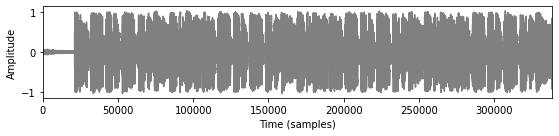

In [28]:
print_plot_play(chorus_array)



Fs = 44100, x.shape = (338689,), x.dtype = float64


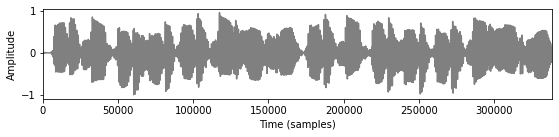

In [23]:
print_plot_play(bassline_array)